### ***Data Cleaning***

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing our customer dataset
loan_data = pd.read_csv("/Users/ashutosh/UG/CaseStudy/loan.csv", low_memory=False)


# We will check for missing values
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [2]:
# After checking the missing values we will remove the columns which are not required & have missing values.
# Not all but which are not required for the analysis.

print("Loan Data before removing the extra columns\n---------------------------------")
loan_data.info()


# We will now remove the ("NA") variables which are of no use as this variables contains no data.
# As we have multiple variables to drop we will use the indexing to drop columns.
# First we removed the variables from the end because removing the variables from beginning will change their index.

loan_data.drop(loan_data.iloc[:, 106:111], axis = 1, inplace = True)

loan_data.drop(loan_data.iloc[:, 53:105], axis = 1, inplace = True)

loan_data.drop(loan_data.columns[[50]], axis = 1, inplace = True)

loan_data.drop(loan_data.columns[[48]], axis = 1, inplace = True)

loan_data.drop(loan_data.columns[[36]], axis = 1, inplace = True)

loan_data.drop(loan_data.iloc[:, 17:20], axis = 1, inplace = True)

print("\nLoan Data after removing the extra columns\n---------------------------------")
loan_data.info()

Loan Data before removing the extra columns
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB

Loan Data after removing the extra columns
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment         

In [3]:
# Converting columns to proper data types as required.


# removed "months" from the column "term" as the data is in months & converted it to int & renamed to "term_months" 
# as the data is numerical we have converted it
loan_data.rename(columns={'term':'term_months'}, inplace=True)
if loan_data.term_months.dtype != int:
    loan_data['term_months'] = loan_data['term_months'].map(lambda x: x.lstrip().rstrip(' months'))
    loan_data['term_months'] = loan_data['term_months'].astype(int)

    
# removed "%" from the column int_rate as the data is in percentage & converted it to float & renamed to "int_rate_percenatage"
# as the data is numerical we have converted it
loan_data.rename(columns={'int_rate':'int_rate_percenatage'}, inplace=True)
if loan_data.int_rate_percenatage.dtype != float:
    loan_data['int_rate_percenatage'] = loan_data['int_rate_percenatage'].map(lambda x: x.rstrip("%"))
    loan_data['int_rate_percenatage'] = loan_data['int_rate_percenatage'].astype(float)

    
# removed "%" from the column revol_util which is basically percentage of utilization. So we don't require the %.
# we will indicate it in the column name as we will rename it to revol_util_percentage & make the column datatype to float.
loan_data.rename(columns={'revol_util':'revol_util_percenatage'}, inplace=True)
if loan_data.revol_util_percenatage.dtype != float:
    loan_data['revol_util_percenatage'] = loan_data['revol_util_percenatage'].str.rstrip("%")
    loan_data['revol_util_percenatage'] = loan_data['revol_util_percenatage'].astype(float)
    
    
# "emp_length" columns as NaN values which we will replace with 99 because replacing it some mean or median value might give us the wrong results.
loan_data["emp_length"].fillna("99", inplace=True)

In [4]:
# Standarising text values
# we dont need "xx" in the end so we removed it.
loan_data['zip_code'] = loan_data['zip_code'].map(lambda x: x.rstrip("xx"))
loan_data['emp_title'] = loan_data['emp_title'].str.upper()
loan_data['title'] = loan_data['title'].str.upper()


# standardise date format
# issue_d, earliest_cr_line, last_pymnt_d
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format="%b-%y")
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format="%b-%y")
loan_data['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], format="%b-%y")


# After datacleaning & data manipulation we can see the dataset info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term_months                 39717 non-null  int64         
 6   int_rate_percenatage        39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  39717 non-null  object    

In [5]:
# will prepare charged_off customer dataset

charged_off_data = loan_data[loan_data['loan_status'] == 'Charged Off']

### Univariate Analysis

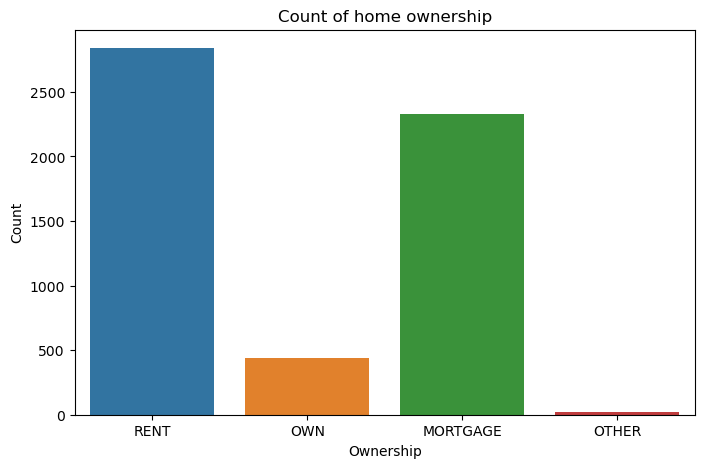

In [6]:
# we will use the home_ownership columns & what type of ownership customers have in common.

ownership = charged_off_data['home_ownership'].unique()
plt.figure(figsize=(8, 5))
sns.countplot(x = charged_off_data['home_ownership'])
plt.title('Count of home ownership')
plt.xlabel("Ownership")
plt.ylabel("Count")

plt.show()

#### ***So from the above observation we can say that most of the customers who are charged-off are either having home_ownership with MORTGAGE or RENT.***
#### ***More than 3500+ customers don't OWN a home.***
#### ***So we can try to avoid such customers in the future who doesn't have ownership or we can do much more investigations for such kind of customers.***

In [7]:
# We will now use the "loan_amount" column to do some univariate analysis on it.
# first we will get basic description from the column about its mean, mode, median, standard deviation, outliners

# Calculate basic statistics
loan_amount_stats = charged_off_data['loan_amnt'].describe()
loan_amount_stats

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

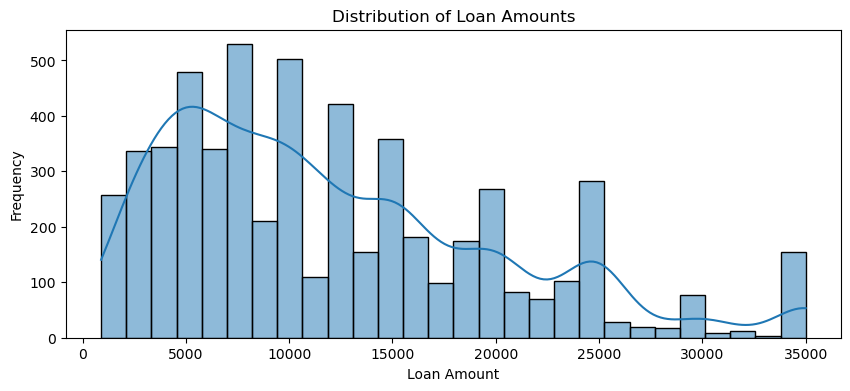

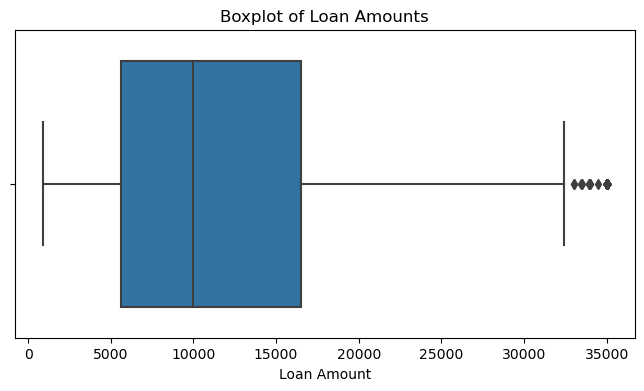

In [8]:
# now we will visualize it
plt.figure(figsize=(10, 4))
sns.histplot(charged_off_data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Identify outliers using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=charged_off_data['loan_amnt'])
plt.title('Boxplot of Loan Amounts')
plt.xlabel('Loan Amount')
plt.show()

#### ***From the above visualization we can observe that the company has lended lots of money in the range of 5000-15000***
#### ***We can observe that the customers between above range are taking the loan but are not likely to pay it.***
#### ***We can get more information of such customers when the amount is ranging between 5000-15000.***

In [9]:
# We will now use the "int_rate_percentage" column to do some univariate analysis on it.
# first we will get basic description from the column about its mean, mode, median, standard deviation, outliners

# Calculate basic statistics
loan_amount_stats = charged_off_data['int_rate_percenatage'].describe()
loan_amount_stats

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate_percenatage, dtype: float64

#### ***From above we can observe that mean is 13.8% for the interest rate***
#### ***Minimum average interest rate provided is of 5.42 %***
#### ***Maximum average interest rate provided is of 24.00%, which seems to be very high***

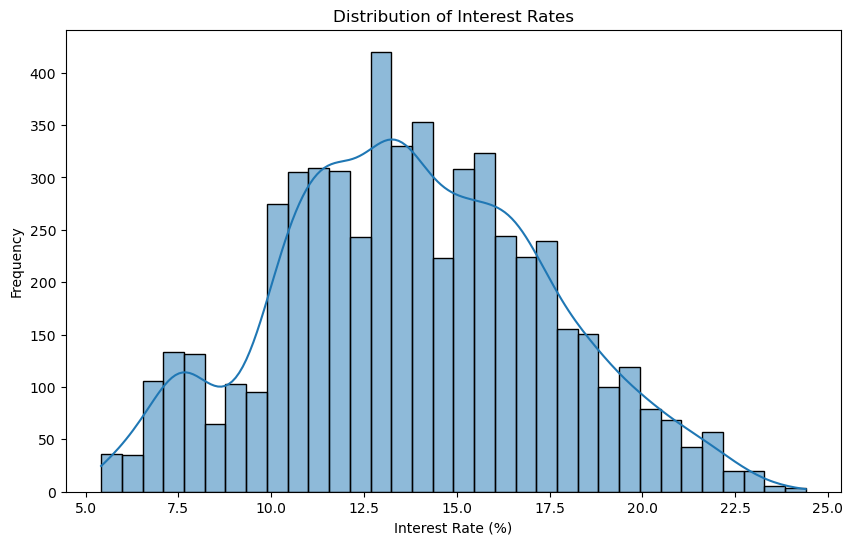

In [10]:
# Lets do some visualization on the above data for "int_rate_percenatage"

plt.figure(figsize=(10, 6))
sns.histplot(charged_off_data['int_rate_percenatage'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

#### ***From the above visualization we can observe that the interest rate between the range of 12.5% to 15.0% is maximum. The defaulters with this interest seems to be not paying the loan amount.***

emp_length
10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
99            228
8 years       203
9 years       158
Name: count, dtype: int64


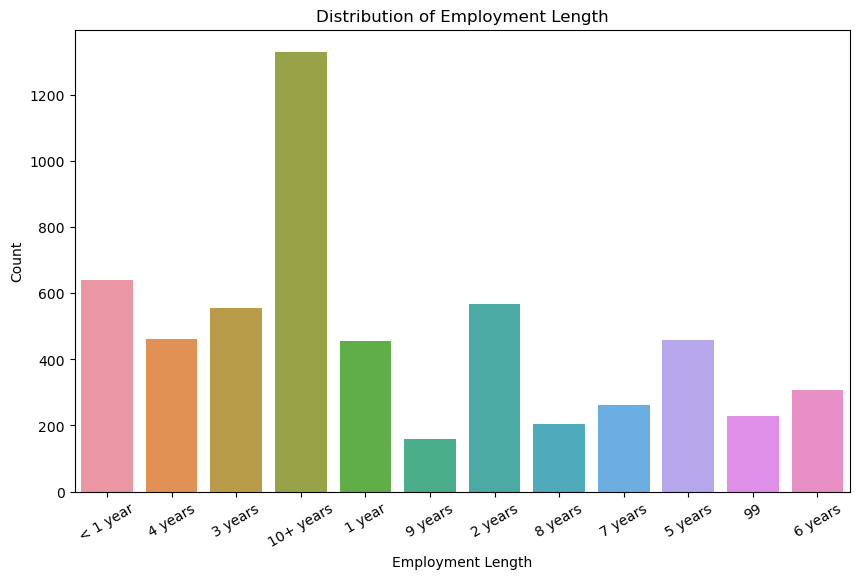

In [11]:
# Calculate value counts for each employment length category
emp_length_counts = charged_off_data['emp_length'].value_counts()
print(emp_length_counts)

# Lets do some visualization on the above data for "emp_length_years"

plt.figure(figsize=(10, 6))
sns.countplot(data=charged_off_data, x='emp_length')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()

#### ***From above we can observe that the highest employee length stands at 10+ years and second highest is <1 year. So we can either say that the employee who are working for long time either not verifying the consumers. Also, we can train employee who are working for <1 year more about provding loan to the consumers.***

addr_state
CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
MA     159
OH     155
WA     127
AZ     123
NC     114
MO     114
NV     108
MI     103
CO      98
CT      94
MN      81
OR      71
SC      66
WI      63
AL      54
LA      53
KY      45
OK      40
UT      40
KS      31
NM      30
HI      28
AR      27
NH      25
RI      25
WV      21
DC      15
AK      15
DE      12
SD      12
MT      11
VT       6
WY       4
NE       3
MS       2
TN       2
ID       1
Name: count, dtype: int64


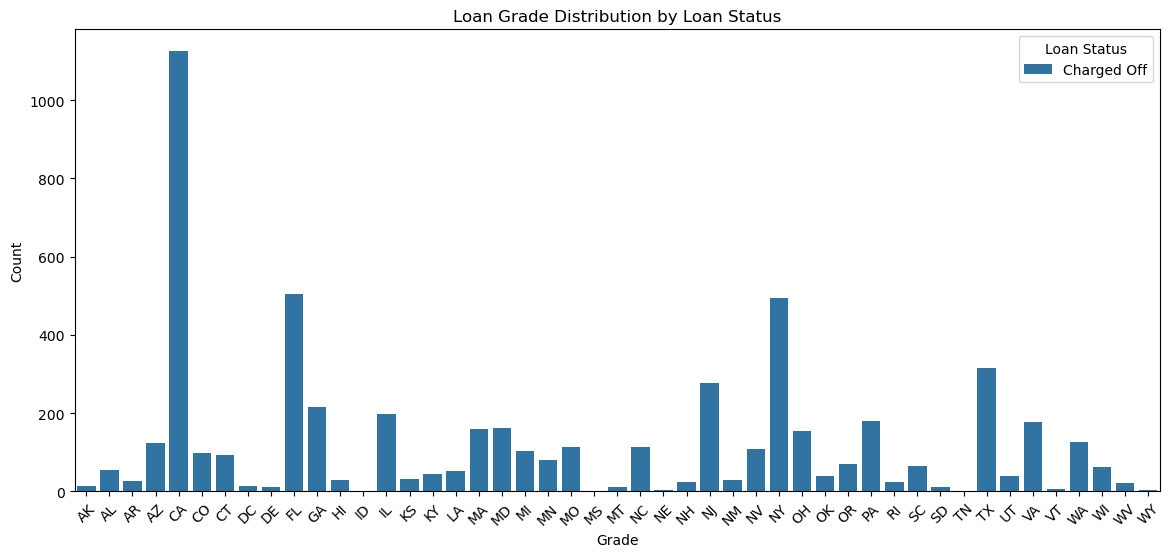

In [12]:
# Calculate value counts for each state
emp_length_counts = charged_off_data['addr_state'].value_counts()
print(emp_length_counts)

# Lets do some visualization on the above data for "addr_state"
# Perform segmented univariate analysis
plt.figure(figsize=(14, 6))
sns.countplot(data=charged_off_data, x='addr_state', hue='loan_status', order=sorted(charged_off_data['addr_state'].unique()))
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### ***From above we can observe that the state "CA" has the highest count of 1125 followed by the state "FL" & "NY" ranking in 2nd & 3rd. So when a loan request comes from the above 3 states we can have some verification & details for the consumers of above state. We have perform some Segmented Univariate Analysis with the addr_state column against the loan_status "Charged-Off"***

### Bivariate Analysis

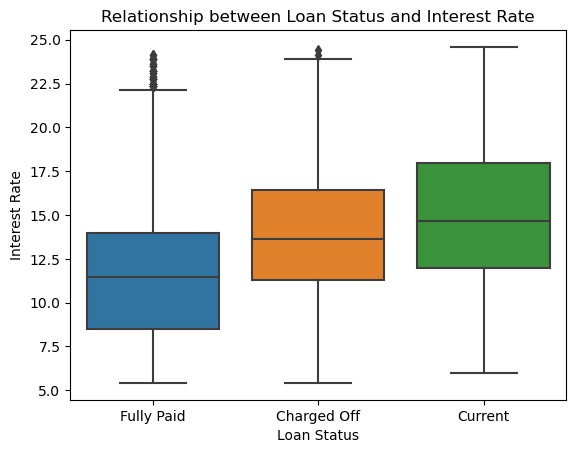

In [13]:
# Perform bivariate analysis
# For example, let's analyze the relationship between 'int_rate' and 'loan_status'
sns.boxplot(x='loan_status', y='int_rate_percenatage', data=loan_data)
plt.title('Relationship between Loan Status and Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

#### We have use some bivariate analysis on the entire dataset & we have compared the "Loan Status" with "Interest Rate".
##### 1. We can observe that "Fully Paid" median value, "Charged-Off" lower quartile & "Current" lower quartile has similar interest rate that it is above 10.0% & below 15.0%. Which we have already observe in the charged-off dataset that the interest rate with range of 10.0% to 15.0%. So while provding the loan to consumer who agree for the given interest rate range we have to do some more verification & get some more details of the customers.

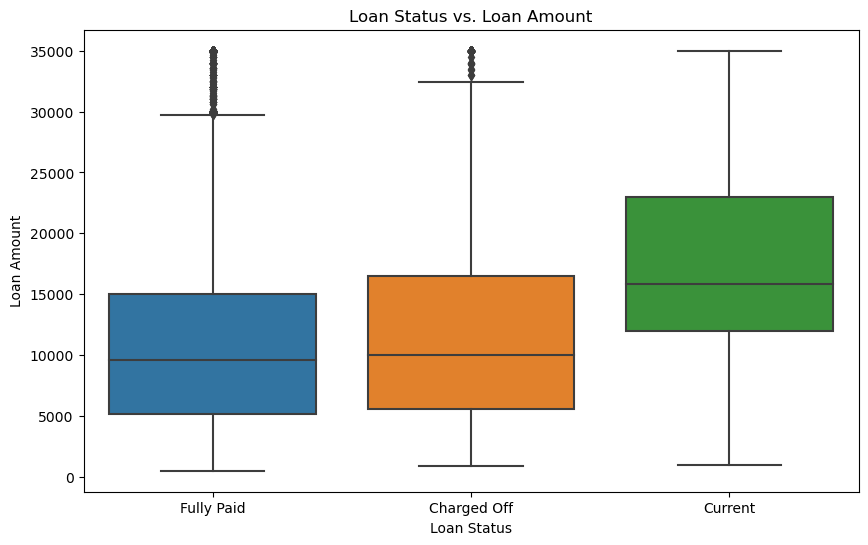

In [14]:
# Example: Box plot of loan status vs. loan amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Status vs. Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

#### We have use some bivariate analysis on the entire dataset & we have compared the "Loan Status" vs. "Loan Amount".
##### 1.We can observe that loan amount for "Fully Paid", "Charged-Off" & "Current"
##### 2.We can observe that the lower quartile & median for "Fully Paid" & "Charged-Off" is similar in between the range of 5000 to 10000. 
##### 3.Also we can observe that median & upper quartile for "Fully Paid" & "Charged-Off" ranges between 10000 to 15000
##### 4.We can assume that we have to make some more verification when loan request with the amount between 5000 to 15000. Either the consumer will pay the loan or we will be defaulter. Doing some extra verification for such loan requests can be helpful to avoid defaulters.